### <Team Basket_Puzzle: 장바구니 분석 알고리즘>
#### 주피터 노트북 환경에서 실행한 코드입니다.
#### 기존 csv파일은, 제품군의 이름이나 판매 데이터셋이 너무 난잡하고 굳이 나라별로 나눌 인사이트도 없는 것 같아서 좀 더 직관적인 데이터셋인 식료품 csv파일로 바꿨습니다.
#### 도/소매로 굳이 나누지 않고, 특정 상품을 검색해 특정 상품의 개수 및 같이 판매된 탑3 제품의 판매데이터를 출력하는 코드를 추가하였습니다.
#### 기존에 연관규칙 학습을 위해서 mlxtend의 association_rules 함수를 사용했었는데, 
#### 호출 시에 num_itemsets 관련 에러가 해결되지 않아서 임시방편으로 custom_association_rules 함수를 직접 구현하여 사용했습니다.
####
#### 주요 기능:
#### 1) 데이터 로드 및 전처리.
#### 2) 자주 판매되는 아이템셋 추출.(Apriori)
#### 3) custom_association_rules를 이용한 연관규칙 분석.
#### 4) 사용자 입력을 통한 추천 알고리즘.
#### 5) 판매 품목 시각화.(품목별 판매량, 자주 판매되는 아이템 세트 등)
#### 6) 특정 상품명 검색에 따른 정보 출력. (판매량, 관련 상품 TOP3)
#### 7) 오류처리 및 유효성 검증.
#### 8) 진행상황 출력.

Loading data...
Data loading completed.
Original dataset: (9835, 33)
Dataset columns: Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data preprocessing in progress...
Total valid transactions: 9835
Total number of unique items: 169
Converting to binary matrix using TransactionEncoder...
Binary matrix transformation completed. DataFrame shape: (9835, 169)


,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Extracting frequent itemsets using Apriori algorithm...
Frequent itemsets extraction completed. Number of frequent itemsets: 333


,support,itemsets
0,0.017692,(baking powder)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)


Calculating association rules... (using custom_association_rules)
Number of generated rules: 125


,antecedents,consequents,antecedent_support,consequent_support,support,confidence,lift
0,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045
1,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780
2,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367
3,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608
4,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999


Data visualization in progress...


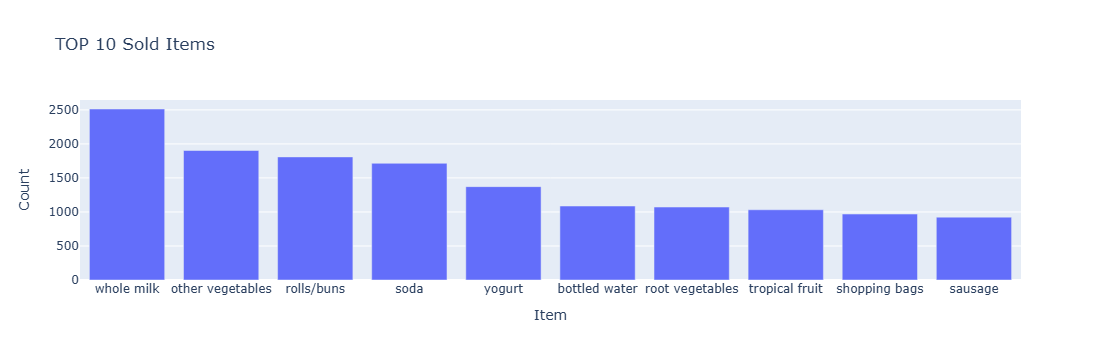

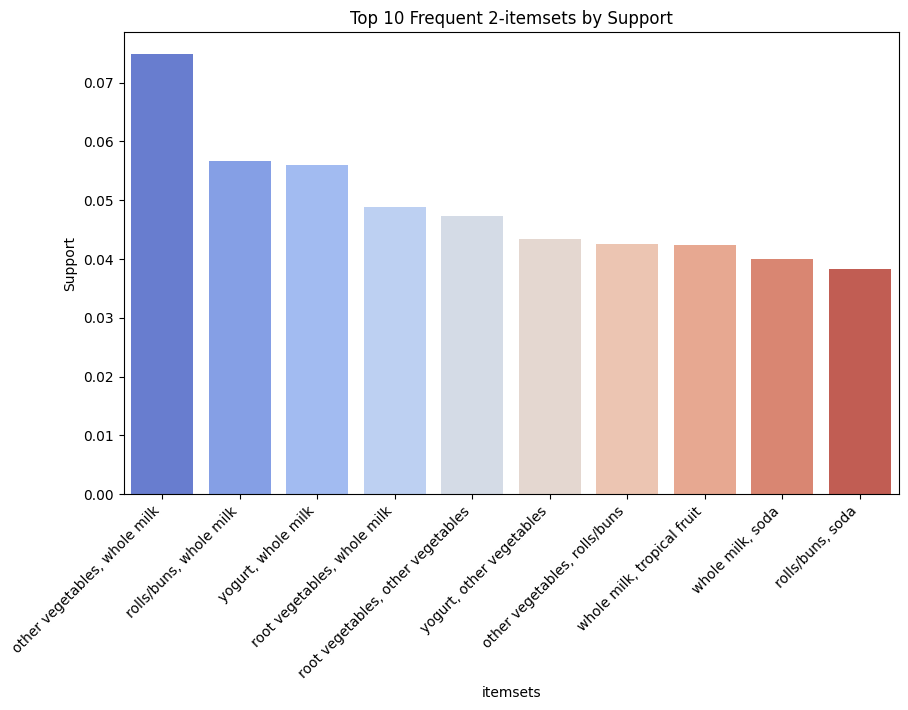

Program is ready.


What items have you purchased? (Separate with commas) [Press Enter to exit]
Input:  other vegetables


Searching for association rule-based recommendations for the entered items...
Recommended item list:
- whole milk


Do you want to check the details of a specific item? Enter the item name (Press Enter to skip):  other vegetables


Total sales of 'other vegetables': 1903
Top 3 items frequently purchased with 'other vegetables':
1. whole milk (736 times)
2. root vegetables (466 times)
3. yogurt (427 times)


What items have you purchased? (Separate with commas) [Press Enter to exit]
Input:  


Exiting the program.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
print("Loading data...")

try:
    df_raw = pd.read_csv("C:/Users/znxls/Downloads/groceries - groceries.csv")
except FileNotFoundError:
    print("File does not exist. Please check the file path.")
    raise

print("Data loading completed.")
print("Original dataset:", df_raw.shape)
print("Dataset columns:", df_raw.columns)
display(df_raw.head())

print("Data preprocessing in progress...")

# items를 제외한 컬럼 추출.
item_cols = [c for c in df_raw.columns if c.lower().startswith('item ') and 'item(s)' not in c.lower()]

if len(item_cols) == 0:
    raise ValueError("Item columns could not be found. Please check the dataset structure.")

# 각 거래별 아이템 리스트 생성. (nan 제외, 소문자 통일)
transactions = []
for idx, row in df_raw[item_cols].iterrows():
    basket = row.dropna().tolist()  
    if len(basket) > 0:
        transactions.append([str(item).strip().lower() for item in basket if str(item).strip() != ""])

if len(transactions) == 0:
    raise ValueError("No valid transactions found. Please check the CSV file or preprocessing logic.")

print("Total valid transactions:", len(transactions))

# 전체 아이템과 아이템 리스트 파악.
all_items = [item for basket in transactions for item in basket]
unique_items = set(all_items)
print("Total number of unique items:", len(unique_items))

print("Converting to binary matrix using TransactionEncoder...")
# 이진 매트릭스로 변환: 각 거래별로 해당 아이템 구매 여부를 T/F로 나타내어
# 알고리즘이 빠르게 처리할 수 있도록 하기 위함.
te = TransactionEncoder()
try:
    te_array = te.fit_transform(transactions, sparse=False)
except ValueError as e:
    print("Error occurred during TransactionEncoder transformation:", e)
    raise

df = pd.DataFrame(te_array, columns=te.columns_)
print("Binary matrix transformation completed. DataFrame shape:", df.shape)
display(df.head())

print("Extracting frequent itemsets using Apriori algorithm...")
# apriori: 지지도를 기반으로 자주 판매되는 아이템셋 추출.
freq_itemsets = apriori(df, min_support=0.01, use_colnames=True)
print("Frequent itemsets extraction completed. Number of frequent itemsets:", freq_itemsets.shape[0])
# 전체 거래에서의 판매 비율.
display(freq_itemsets.head())
print("Calculating association rules... (using custom_association_rules)")
# custom_association_rules 함수: apriori 결과를 기반으로 직접 연관규칙(전건->후건) 도출.

import itertools

def custom_association_rules(freq_itemsets, metric="confidence", min_threshold=0.3):
    """
    freq_itemsets: apriori 알고리즘 결과로 얻은 빈발 아이템셋 정보가 담긴 DataFrame.
    metric: 연관규칙을 필터링할 기준 지표.
    min_threshold: metric 기준으로 규칙을 걸러낼 최소값.

    이 함수는 빈발 아이템셋을 활용해 전건과 후건을 나누어
    연관규칙을 계산. 각 규칙에 대해 다음 정보를 반환:
    - antecedent_support: 전건 아이템셋의 지지도.
    - consequent_support: 후건 아이템셋의 지지도.
    - support: 전건과 후건을 합한 아이템셋의 지지도.
    - confidence: 전건이 주어졌을 때 후건이 나타날 확률.(신뢰도)
    - lift: 전건 발생 시 후건 발생 가능성을 얼마나 높이는지 나타내는 지표.(향상도)

    결과는 DataFrame 형태로 반환되며, 지정한 metric과 min_threshold를 만족하는 규칙들만 포함.
    """
    if 'itemsets' not in freq_itemsets.columns or 'support' not in freq_itemsets.columns:
        raise ValueError("'freq_itemsets' DataFrame must have 'itemsets' and 'support' columns.")

    support_dict = {frozenset(item): supp for item, supp in zip(freq_itemsets['itemsets'], freq_itemsets['support'])}
    rules_list = []

    # 길이가 2 이상인 아이템셋에 대해 모든 전건/후건 조합 탐색.
    for itemset in freq_itemsets['itemsets']:
        if len(itemset) < 2:
            continue
        for r in range(1, len(itemset)):
            for antecedent in map(frozenset, itertools.combinations(itemset, r)):
                consequent = itemset - antecedent
                support_itemset = support_dict[itemset]
                support_antecedent = support_dict[antecedent]
                support_consequent = support_dict.get(consequent, None)
                if support_consequent is None:
                    continue
                confidence = support_itemset / support_antecedent
                lift = confidence / support_consequent
                
                # metric 기준 필터.
                if metric == "confidence":
                    if confidence >= min_threshold:
                        rules_list.append((antecedent, consequent, support_antecedent, support_consequent, support_itemset, confidence, lift))
                elif metric == "lift":
                    if lift >= min_threshold:
                        rules_list.append((antecedent, consequent, support_antecedent, support_consequent, support_itemset, confidence, lift))
                else:
                    raise ValueError("The metric must be 'confidence' or 'lift'.")

    columns = ['antecedents', 'consequents', 'antecedent_support', 'consequent_support', 
               'support', 'confidence', 'lift']
    rules_df = pd.DataFrame(rules_list, columns=columns)
    rules_df = rules_df.sort_values('lift', ascending=False).reset_index(drop=True)
    return rules_df

rules = custom_association_rules(freq_itemsets, metric='confidence', min_threshold=0.3)
print("Number of generated rules:", rules.shape[0])
display(rules.head())

print("Data visualization in progress...")
item_counts = pd.Series(all_items).value_counts()
top10_items = item_counts.head(10)
fig = px.bar(x=top10_items.index, y=top10_items.values, 
             title="TOP 10 Sold Items",
             labels={'x':'Item', 'y':'Count'})
fig.show()

# 자주 판매되는 2개의 아이템셋 상위 10개에 대한 시각화.
# 2개 아이템이 함께 구매되는 패턴을 barplot으로 표시.
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
top_freq_2_itemsets = freq_itemsets[freq_itemsets['length']==2].sort_values('support', ascending=False).head(10)
plt.figure(figsize=(10,6))
itemset_str = top_freq_2_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
sns.barplot(x=itemset_str, y=top_freq_2_itemsets['support'], palette='coolwarm')
plt.title("Top 10 Frequent 2-itemsets by Support")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Support")
plt.show()

def item_info(item_name):
    """
    특정 상품에 대한 정보 출력:
    - 전체 판매량.
    - 함께 자주 구매되는 상품 TOP3.
    """
    item_name = item_name.strip().lower()
    if item_name not in unique_items:
        print(f"'{item_name}' does not exist in the dataset. Please enter a valid item.")
        return None
    total_sales = sum([1 for basket in transactions if item_name in basket])
    co_items = []
    for basket in transactions:
        if item_name in basket:
            co_items.extend([i for i in basket if i != item_name])
    co_item_counts = pd.Series(co_items).value_counts().head(3)
    print(f"Total sales of '{item_name}': {total_sales}")
    if len(co_item_counts)>0:
        print(f"Top 3 items frequently purchased with '{item_name}':")
        for rank, (itm, cnt) in enumerate(co_item_counts.items(), start=1):
            print(f"{rank}. {itm} ({cnt} times)")
    else:
        print(f"No items are frequently purchased with '{item_name}'.")
    return {'sales': total_sales, 'co_items': co_item_counts}

def get_recommendations(user_items):
    """
    사용자 구매 상품 기반 추천:
    - user_items를 전건으로 하는 연관규칙을 찾아 후건 추천.
    - lift 기준 정렬 후 상위 3개 상품 추천.
    """
    user_set = frozenset([itm.strip().lower() for itm in user_items])
    filtered_rules = rules[rules['antecedents'] == user_set]
    if filtered_rules.empty:
        return []
    filtered_rules = filtered_rules.sort_values('lift', ascending=False)
    recommended = []
    for conseq in filtered_rules['consequents']:
        recommended.extend(list(conseq))
    recommended = list(set(recommended) - user_set)
    return recommended[:3]

print("Program is ready.")

while True:
    print("="*60)
    user_input = input("What items have you purchased? (Separate with commas) [Press Enter to exit]\nInput: ").strip()
    
    if user_input == "":
        print("Exiting the program.")
        break
    
    user_items = [itm.strip().lower() for itm in user_input.split(',') if itm.strip() != ""]
    valid_items = [itm for itm in user_items if itm in unique_items]
    
    if len(valid_items) == 0:
        print("The entered items do not exist in the dataset. Please enter valid items.")
        continue
    
    print("Searching for association rule-based recommendations for the entered items...")
    recs = get_recommendations(valid_items)
    if len(recs)>0:
        print("Recommended item list:")
        for r in recs:
            print("-", r)
    else:
        print("No items to recommend.")
    
    while True:
        item_search = input("Do you want to check the details of a specific item? Enter the item name (Press Enter to skip): ").strip()
        if item_search == "":
            break
        _info = item_info(item_search)
        if _info is not None:
            break